# A Jupyter Kernel for Logtalk

This notebook provides an overview of the functionality and implementation of the Logtalk Jupyter kernel.

Running this notebook assumes Logtalk is installed using one of the provided installers or by running the manual installation script.

The default backend can be changed in the fly by adding a code cell at the top and running one of the following queries: `eclipse`, `gnu`, `sicstus`, `swi`, `trealla`, `xvm`, or `yap` (assuming that all these backend Prolog systems are installed). The default backend can be set for all notebooks in a directory by using a `logtalk_kernel_config.py` file (see the [logtalk-jupyter-kernel](https://github.com/LogtalkDotOrg/logtalk-jupyter-kernel) repo for details). If this file is not present, the default backend is SWI-Prolog.

This notebook is currently running using:

In [1]:
%versions

Logtalk 3.89.1-stable
XVM 10.2.2
Logtalk Jupyter kernel 0.19.0-beta

true

## Execute Queries

Code cells can contain queries, multiple terms to be interpreted as directives and clauses to be added to a file, or code to be highlighted. By default, the contents of a code cell is interpreted as a query. For example:

In [2]:
current_logtalk_flag(version_data, VersionData).

VersionData = logtalk(3,89,1,stable)

In [3]:
X = [1,2,3], list::append(X, [4,5,6], Z).

X = [1,2,3],
Z = [1,2,3,4,5,6]

We can also write multiple queries in a single cell:

In [4]:
current_logtalk_flag(unicode, Unicode).
current_logtalk_flag(encoding_directive, EncodingDirective).

Unicode = full

EncodingDirective = source

## Access and Reuse Query Bindings

The variable bindings from previous queries can be accessed by using the `%bindings` line magic:

In [5]:
%bindings

$VersionData = logtalk(3,89,1,stable)
$X = [1,2,3]
$Z = [1,2,3,4,5,6]
$Unicode = full
$EncodingDirective = source

true

Variable bindings can be reused using the corresponding `$Var` term. For example:

In [6]:
forall(list::member(X, $Z), write(X)).


123456

Z = [1,2,3,4,5,6]

We can also print the previous queries using the `%queries` line magic:

In [7]:
%queries

jupyter::versions,
current_logtalk_flag(version_data,VersionData),
X=[1,2,3],list::append(X,[4,5,6],Z),
current_logtalk_flag(unicode,Unicode),
current_logtalk_flag(encoding_directive,EncodingDirective),
jupyter::print_variable_bindings,
forall(list::member(X,Z),write(X)).

true

## Define Predicates

Predicates can be defined in `user` by using the `%%user` cell magic in the first line of a code cell:

In [8]:
%%user

my_append([], Res, Res).
my_append([H|T], List, [H|Res]) :-
  my_append(T, List, Res).

true

Running a code cell defining predicates adds them to the database of the running kernel, making them available for use in queries:

In [9]:
my_append([1,2], [3,4], R).

R = [1,2,3,4]

Predicate definitions can be split in multiple cells. For example:

In [10]:
%%user

fact(a).
fact(b).

true

In the next cell, the previous clauses are replaced by new ones:

In [11]:
%%user

fact(c).
fact(d).

true

In [12]:
findall(X, fact(X), L).

L = [c,d]

But new clauses can be added instead by declaring a predicate *discontiguous* and later using instead the `%%user+` cell magic (think of `+` as meaning append):

In [13]:
%%user

:- discontiguous(a/1).
a(1).
a(2).

true

In [14]:
%%user+

b(3).
a(4).

true

In [15]:
listing(a/1), listing(b/1).

a(1).
a(2).
a(4).
b(3).

true

## Define Objects, Protocols, and Categories

Logtalk entities are preferably defined using the `%%file FILENAME` or `%%file+ FILENAME` cell magic (the `+` variant appends to an existing file instead of redefining it). For example:

In [16]:
%%file foo.lgt

:- object(foo).

    :- public(bar/0).
    bar :-
        write('Hello world!\n').

:- end_object.

true

Running a code cell defining Logtalk entities adds them to the database of the running kernel, making them available for use in queries:

In [17]:
foo::bar.

Hello world!

true

## Highlight Code

Sometimes we want to simply display some code in a cell, benefiting from syntax highlight. This can be accomplished by using the `%%highlight` cell magic. For example:

In [18]:
%%highlight

:- object(hello_world).

	% the initialization/1 directive argument is automatically executed
	% when the object is loaded into memory:
	:- initialization(write('Hello World!\n')).

:- end_object.

## Handling Multiple Solutions

As a notebook code cell doesn't provide the same interactive features of a traditional top-level interpreter, we can either ask for the next solution for a query in the next cell or, if practical/feasible, ask for all solutions at once.

In [19]:
list::member(M, [a,b,c]).

M = a

In [20]:
jupyter::retry.

M = b

We can also simply type:

In [21]:
retry.

M = c

In altenative:

In [22]:
findall(M, list::member(M, [a,b,c]), L).

L = [a,b,c]

## Debugging

The Logtalk `debugger` tool is loaded by default when we start a kernel. To illustrate, we load an example, compiling it in debug mode:

In [23]:
set_logtalk_flag(debug, on), {elephants(loader)}.

true

Try one of examples queries:

In [24]:
fred::number_of_legs(N).

N = 4

Debugging cannot be performed interactively. But we can print the trace of a goal:

In [25]:
debugger::trace, fred::number_of_legs(N), debugger::notrace.

   Call: (1) fred::number_of_legs(_R34179)
   Call: (2) number_of_legs(_R34179)
   Fact: (2) number_of_legs(4)
   Exit: (2) number_of_legs(4)
   Exit: (1) fred::number_of_legs(4)

N = 4

We can also use spy points to narrow the debugging output. For example:

In [26]:
{planets(loader)}, debugger::spy(gravitational_acceleration/1), mars::weight(m2, W2).

     All specified breakpoints added.
+  Call: (6) gravitational_acceleration(_R38286)
+  Fact: (6) gravitational_acceleration(3.7200000000000002)
+  Exit: (6) gravitational_acceleration(3.7200000000000002)

W2 = 14.880000000000001

Turn off debugging and compiling in debug mode:

In [27]:
debugger::nodebug, set_logtalk_flag(debug, off).

true

## Running Tests

Tests can be run by loading their driver file. For example:

In [28]:
{ack(tester)}.

% 
% tests started at 2025-02-19, 22:28:15
% 
% running tests from object tests
% file: /Users/pmoura/logtalk/examples/ack/tests.lgt
% 
% ack_1: success (in 0.001327000/0.001340866 cpu/wall seconds)
% ack_2: success (in 0.042833000/0.042982101 cpu/wall seconds)
% ack_3: success (in 0.311227000/0.311851978 cpu/wall seconds)
% 
% 3 tests: 0 skipped, 3 passed, 0 failed (0 flaky)
% runtime: 0.355387000/0.356174946 cpu/wall seconds
% completed tests from object tests
% 
% 
% clause coverage ratio and covered clauses per-entity predicate
% 
% ack: ack/3 - 3/3 - (all)
% ack: 3 out of 3 clauses covered, 100.00% coverage
% 
% 1 entity declared as covered containing 3 clauses
% 1 out of 1 entity covered, 100.00% entity coverage
% 3 out of 3 clauses covered, 100.00% clause coverage
% 
% tests ended at 2025-02-19, 22:28:16
% 

true

## Benchmarking Capabilities

Whenever a query is executed, its runtime is stored in the database and can be accessed immediately after:

In [29]:
list::member(M, [1,2,3]).

M = 1

In [30]:
jupyter::print_query_time.

Query:   list::member(M,[1,2,3])
Runtime: 0.00010991096496582031 s

true

## Structured Output

Query bindings can be displayed in a table with a row per solution and a column per variable binding by using the `%%table` cell magic:

In [31]:
%%table
list::member(Number, [10,20,30,40]), Square is Number*Number.

Number | Square | 
:- | :- | 
10 | 100 | 
20 | 400 | 
30 | 900 | 
40 | 1600 | 

true

Columns for variables whose name starts with an underscore are omitted. For example:

In [32]:
%%table
_List = [10,20,30,40], list::nth1(Position, _List, Element).

Position | Element | 
:- | :- | 
1 | 10 | 
2 | 20 | 
3 | 30 | 
4 | 40 | 

true

To print a table but also save it to a CSV or TSV file, use instead the `%%csv file.csv` or `%%tsv file.tsv` cell magics. For example:

In [33]:
%%tsv flags.tsv
current_logtalk_flag(Flag, Value).

Flag | Value | 
:- | :- | 
linter | default | 
always_true_or_false_goals | warning | 
arithmetic_expressions | warning | 
catchall_catch | silent | 
conditionals | warning | 
deprecated | warning | 
disjunctions | warning | 
duplicated_clauses | silent | 
duplicated_directives | warning | 
encodings | warning | 
general | warning | 
grammar_rules | warning | 
lambda_variables | warning | 
left_recursion | warning | 
missing_directives | warning | 
naming | silent | 
portability | silent | 
redefined_built_ins | silent | 
redefined_operators | warning | 
singleton_variables | warning | 
steadfastness | silent | 
suspicious_calls | warning | 
tail_recursive | silent | 
trivial_goal_fails | warning | 
undefined_predicates | warning | 
unknown_entities | warning | 
unknown_predicates | warning | 
complements | deny | 
context_switching_calls | allow | 
dynamic_declarations | deny | 
events | deny | 
clean | on | 
code_prefix | \$ | 
debug | off | 
optimize | off | 
reload | changed | 
report | warnings | 
scratch_directory | '/private/var/folders/w9/0h2yhwgh8xj42v0059bpn5h00000gn/T/logtalk14008/' | 
source_data | on | 
version_data | logtalk(3,89,1,stable) | 
settings_file | allow | 
prolog_compatible_version | @>=(v(10,0,0)) | 
prolog_dialect | xvm | 
prolog_version | v(10,2,2) | 
underscore_variables | dont_care | 
coinduction | unsupported | 
encoding_directive | source | 
engines | supported | 
modules | unsupported | 
tabling | unsupported | 
threads | supported | 
unicode | full | 
prolog_compiler | [] | 
prolog_loader | [] | 
suppress_path_prefix | '' | 

true

## Data Visualization

Data visualization is available by using the `%%data` cell magic and a single goal that binds a variable named `Data` to a list of pairs. The `type` and `title` keys are required. The other keys depend on the type of visualization. Currently, data visualization can use the `matplotlib` plots illustrated next. The `xlabel` and `ylabel` keys, when accepted by a specific plot type, are optional.

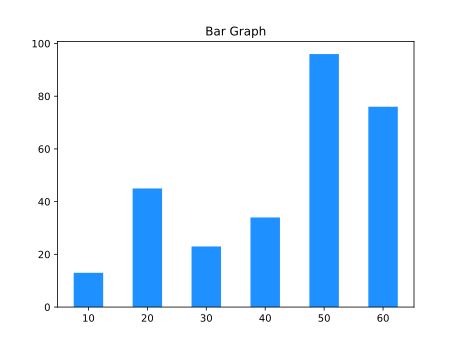

Data = [type-bar,title-'Bar Graph',x-[10,20,30,40,50,60],height-[13,45,23,34,96,76],color-dodgerblue,width-5]

In [34]:
%%data
Data = [type-bar, title-'Bar Graph', x-[10, 20, 30, 40, 50, 60], height-[13, 45, 23, 34, 96, 76], color-dodgerblue, width-5].

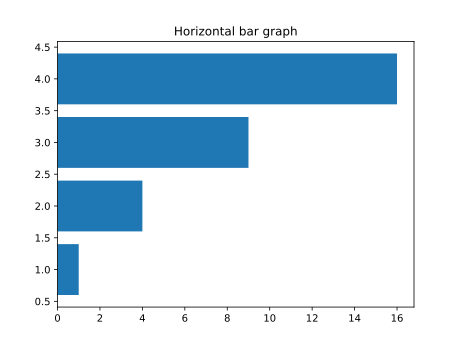

Data = [type-barh,title-'Horizontal bar graph',y-[1,2,3,4],width-[1,4,9,16]]

In [35]:
%%data
Data = [type-barh, title-'Horizontal bar graph', y-[1,2,3,4], width-[1,4,9,16]]

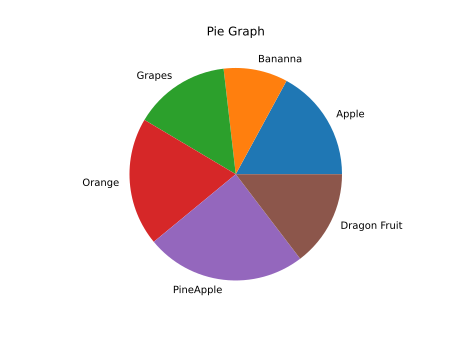

Data = [type-pie,title-'Pie Graph',x-[35,20,30,40,50,30],labels-['Apple','Bananna','Grapes','Orange','PineApple','Dragon Fruit']]

In [36]:
%%data
Data = [type-pie, title-'Pie Graph', x-[35, 20, 30, 40, 50, 30], labels-['Apple', 'Bananna', 'Grapes', 'Orange', 'PineApple', 'Dragon Fruit']].

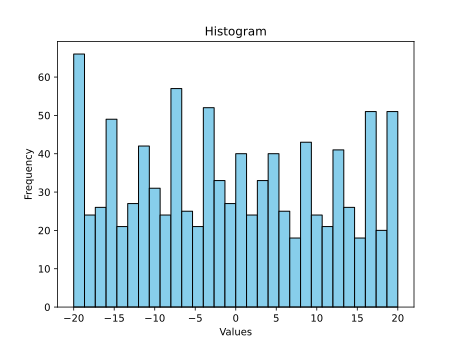

List = [-17,-2,9,18,0,-8,4,17,7,-1,4,-15,-12,8,-14,2,-12,-2,-3,-20,3,-1,-4,-8,-18,3,20,-7,-13,-12,-19,16,14,13,-7,-10,13,-20,-19,-19,-18,20,3,4,-5,7,15,16,12,3,-8,9,-4,12,-17,-4,4,7,6,-17,-9,4,-20,18,13,6,-4,-2,-20,5,18,-11,19,18,15,-10,-8,11,3,-12,-17,-15,-14,-11,17,11,-7,-9,-2,-20,3,19,18,-8,20,-7,4,-3,-20,-16,3,-7,-19,15,4,7,5,9,14,10,18,18,-12,-18,12,1,-8,2,-4,5,5,12,2,-18,-5,-6,15,-8,16,-7,3,-11,11,17,12,-15,-7,0,-9,15,-12,17,-16,7,14,6,13,-17,15,10,-13,-17,1,-17,-15,16,-7,6,7,3,2,-18,-13,3,-19,8,-17,3,-5,-2,-19,-1,13,-11,16,-4,17,-10,-8,10,-18,-5,20,-18,-3,17,-4,11,-19,-12,3,18,-1,-17,-16,-7,10,11,4,-7,13,-6,-10,3,-6,15,6,19,14,1,-18,-2,-19,-16,-4,19,-14,-2,5,-18,-2,19,0,-16,12,-7,-13,-2,11,-11,1,17,9,14,19,19,-19,11,12,-15,-9,7,8,0,-8,0,-15,17,-19,2,-3,2,2,-1,-5,3,12,2,1,-2,19,16,15,-1,3,-15,-12,-16,13,-13,-11,-14,8,5,-20,-18,9,17,-13,-11,14,-20,-19,13,9,2,-19,7,8,-10,5,-19,17,16,-16,19,14,10,11,6,-8,-19,14,-4,6,-9,-17,17,10,5,13,-3,-1,-1,-2,-2,-12,-11,-3,19,3,-12,-2,-4,-15,-7,-

In [37]:
%%data
logtalk_load(random(loader)),
random::sequence(1000, -20, 20, List),
Data = [type-hist, title-'Histogram', x-List, bins-30, color-skyblue, edgecolor-black, xlabel-'Values', ylabel-'Frequency'].

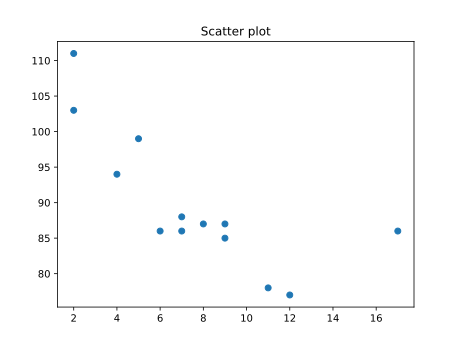

Data = [type-scatter,title-'Scatter plot',x-[5,7,8,7,2,17,2,9,4,11,12,9,6],y-[99,86,87,88,111,86,103,87,94,78,77,85,86]]

In [38]:
%%data
Data = [type-scatter, title-'Scatter plot', x-[5,7,8,7,2,17,2,9,4,11,12,9,6], y-[99,86,87,88,111,86,103,87,94,78,77,85,86]].

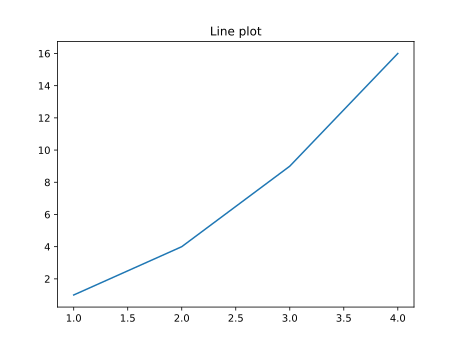

Data = [type-plot,title-'Line plot',x-[1,2,3,4],y-[1,4,9,16]]

In [39]:
%%data
Data = [type-plot, title-'Line plot', x-[1,2,3,4], y-[1,4,9,16]].

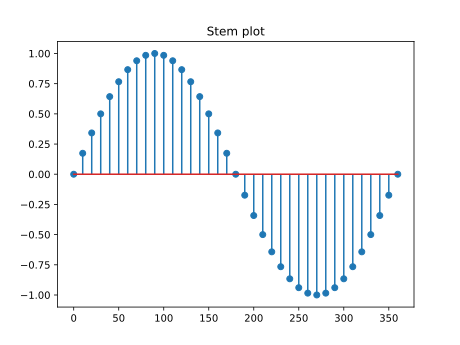

Xs = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360],
Ys = [0.0,0.17364817766693033,0.34202014332566871,0.49999999999999994,0.64278760968653925,0.76604444311897801,0.8660254037844386,0.93969262078590832,0.98480775301220802,1.0,0.98480775301220802,0.93969262078590843,0.86602540378443882,0.76604444311897801,0.64278760968653947,0.49999999999999994,0.34202014332566888,0.17364817766693025,1.2246467991473532e-16,-0.17364817766693047,-0.34202014332566866,-0.50000000000000011,-0.64278760968653925,-0.7660444431189779,-0.86602540378443837,-0.93969262078590821,-0.98480775301220802,-1.0,-0.98480775301220813,-0.93969262078590854,-0.8660254037844386,-0.76604444311897812,-0.64278760968653958,-0.50000000000000044,-0.34202014332566855,-0.17364817766693127,-2.4492935982947064e-16],
Data = [type-stem,title-'Stem plot',x-[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,26

In [40]:
%%data
logtalk_load(types(loader)),
integer::sequence(0,360,10,Xs),
findall(Y, (list::member(X,Xs), Y is sin((X*pi)/180)), Ys),
Data = [type-stem, title-'Stem plot', x-Xs, y-Ys].

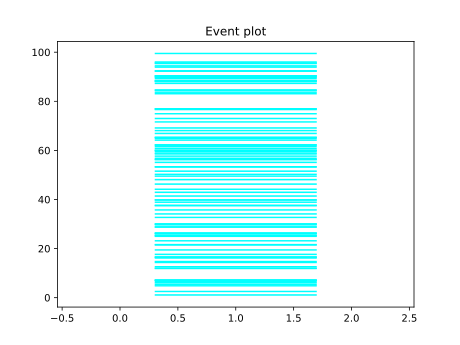

Positions = [51.536916304283764,53.344371064168307,30.051638425175842,84.570092115069599,83.727005823159928,88.524885251728932,56.240347478605472,49.510236896678038,50.244064468603121,25.210948490546279,88.286126793634907,68.065151770695564,32.698938202598036,28.724915251707717,1.0840644888794548,48.079890829485052,93.934050706809757,89.791645305022797,57.660997169797753,88.278177950310294,66.902485704665153,74.937884921204699,44.162649479270222,58.920878869744818,12.594660009660696,17.626703486068919,64.917399795889878,56.777594261446239,65.259445179565432,29.647015767175631,62.280048445200542,90.423358567736116,21.489744224404951,39.806448755724368,7.1383817312683284,41.403872239878602,83.100800842336795,94.421816434702023,87.294622125782112,39.803583207396272,19.442235028159118,26.354245803451782,16.167266826649616,99.487708389273834,95.400927426918329,60.744367248807961,23.159359281828507,16.539200333341153,65.313580217398552,76.918523987558189,84.553694056161405,42.914015672070136

In [41]:
%%data
logtalk_load(random(loader)),
random::randseq(100, 0.0, 100.0, Positions),
Data = [type-eventplot, title-'Event plot', positions-Positions, orientation-vertical, linelengths-1.4, color-cyan].

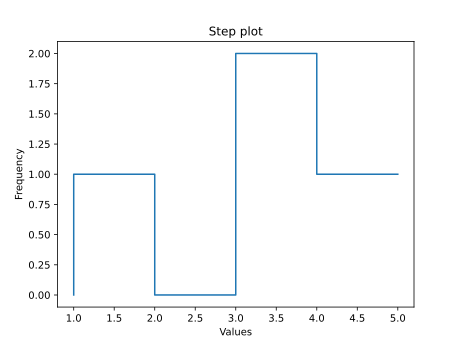

Data = [type-step,title-'Step plot',x-[1,2,3,4,5],y-[0,1,0,2,1],xlabel-'Values',ylabel-'Frequency']

In [42]:
%%data
Data = [type-step, title-'Step plot', x-[1, 2, 3, 4, 5], y-[0, 1, 0, 2, 1], xlabel-'Values', ylabel-'Frequency'].

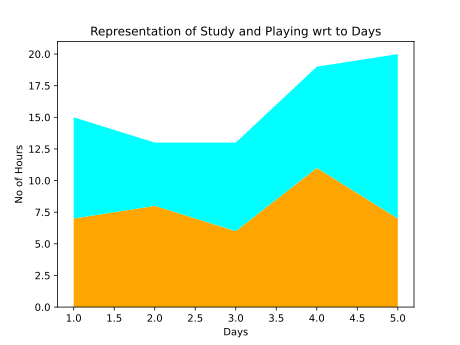

Days = [1,2,3,4,5],
Studying = [7,8,6,11,7],
Playing = [8,5,7,8,13],
Data = [type-stackplot,title-'Representation of Study and Playing wrt to Days',x-[1,2,3,4,5],y-[[7,8,6,11,7],[8,5,7,8,13]],colors-[orange,cyan],xlabel-'Days',ylabel-'No of Hours']

In [43]:
%%data

% List of Days
Days = [1, 2, 3, 4, 5], 
% Number of Study Hours
Studying = [7, 8, 6, 11, 7],
% Number of Playing Hours
Playing = [8, 5, 7, 8, 13],
% Stack plot with X, Y, colors value
Data = [type-stackplot, title-'Representation of Study and Playing wrt to Days', x-Days, y-[Studying, Playing], colors-[orange, cyan], xlabel-'Days', ylabel-'No of Hours'].

## Printing Terms

Complex compound terms can be displayed as a tree by using the `%%tree` cell magic:

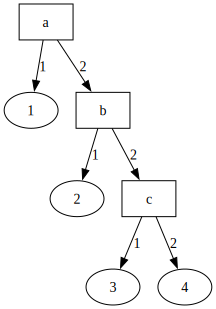

true

In [44]:
%%tree
a(1, b(2, c(3, 4))).

## Cell and Line Magic

Help on available cell and line magic can be printed using either the `jupyter::magic` query or by using the `%magic` line magic:

In [45]:
%magic

Cell magic:

    %%load FILE.EXT
        Saves and loads a file using the logtalk_load/2 predicate
    %%save FILE.EXT
        Saves a file
    %%file FILE.EXT
        Saves and loads a file using the logtalk_load/2 predicate
    %%file+ FILE.EXT
        Appends to a file and loads it using the logtalk_load/2 predicate
    %%user
        Saves and loads a user.lgt file using the logtalk_load/2 predicate
    %%user+
        Appends to a user.lgt file and loads it using the logtalk_load/2 predicate

    %%table
        Prints a table with a column per variable binding for all goal solutions
    %%csv FILE.csv
        Prints a table with a column per variable binding for all goal solutions but also saves it to a CSV file
    %%tsv FILE.tsv
        Prints a table with a column per variable binding for all goal solutions but also saves it to a TSV file
    %%data
        Data visualization for a goal binding a variable named Data with a list of pairs
    %%tree
        Prints a tree represe

true

## Introspection

- Various `jupyter` predicates
    - Access documentation with a help predicate

In [46]:
jupyter::help.

jupyter::halt or halt

    Shuts down the running Logtalk process.

    The next time code is to be executed, a new process is started.
    Everything defined in the database before does not exist anymore.

    Corresponds to the functionality of halt/0.
    Has the same effect as interrupting or restarting the Jupyter kernel.

--------------------------------------------------------------------------------

jupyter::help

    Outputs the documentation for all predicates from object jupyter.

--------------------------------------------------------------------------------

jupyter::versions

    Prints Logtalk, Prolog backend, and Jupyter kernel versions.

--------------------------------------------------------------------------------

jupyter::magic

    Outputs the documentation for all cell and line magic.

--------------------------------------------------------------------------------

jupyter::print_query_time

    Prints the previous query and its runtime in seconds.

---------

true

- Various `juypter` (mostly convenience) predicates
- Difficult to remember all of them
    - In addition to completion and inspection: predicate to print all documentation

## Jupyter

- Originates from the **IPython** project
    - Enables interactive Python development
    - Several frontends, including a former version of **Jupyter Notebook**
        - Web application for handling Jupyter notebooks
        - Planned to be replaced by **JupyterLab**



- *Two-process model*:

    - Client process: responsible for user interaction
    - Kernel process: handles code execution

## Architecture






Kernel split in three:
- Extends IPython kernel: **inherits** the communication with a frontend via the ZeroMQ protocol


- Does not interpret Logtalk itself
    - Starts an existing Logtalk instance in a **subprocess**
        - Communicates with it according to the JSON-RPC 2.0 protocol
    - For any code execution **request**:
        - Sends a request message to the Logtalk server containing the **code**
        - Terms are read from the code and handled
    
    
- Make the kernel **extensible**: additional layer of a *kernel implementation* in between
    - **Responsible** for basically all functionality (e.g. handling Logtalk **server**)
    - For every request the kernel receives, a **method** of the implementation class is called
    - Kernel started: loads **config** file
        - Can contain paths to interpreter-specific Python class files
    - By **extending** default implementation class and **overriding** methods
        - Kernel behaviour can be adjusted
    - Had to be done to support predicate inspection for both    
- Configure to start a different Logtalk server

## Changing the Prolog Backend

- Switch between Prolog backends on the fly
- The previous server process is kept running
    - When switching back, the database state has not changed

Several Prolog backends are supported and shortcuts are provided to switch to them if installed:

- ECLiPSe (`eclipse`)
- GNU Prolog (`gnu`)
- SICStus Prolog (`sicstus`)
- SWI-Prolog (`swi`)
- Trealla Prolog (`trealla`)
- XVM (`xvm`)
- YAP (`yap`)

The above shortcuts assume Logtalk was installed using either one of the provided installers or by running the manual installation script (i.e. you can run e.g. Logtalk with SWI-Prolog by simply typing `swilgt` on a POSIX system or `swilgt.ps1` on a Windows system). Alternatively, that you're running Logtalk from a git clone directory with the `LOGTALKHOME` and `LOGTALKUSER` environment variables defined and pointing to the clone directory (i.e. you can run e.g. Logtalk with SWI-Prolog by simply typing `swilgt.sh` on a POSIX system). But you can always switch Prolog backends using the `jupyter::set_prolog_backend(BackendIntegrationScript)` predicate instead (e.g. `jupyter::set_prolog_backend('swilgt.sh')`).

In [47]:
gnu.

true

Define our own list append predicate and consult it:

In [48]:
%%file app.pl

app([], List, List).
app([Head| Tail], List, [Head| Tail2]) :-
    app(Tail, List, Tail2).

yes

In [49]:
app([1,2], [3], R).

R = [1,2,3]

## Extending the Kernel

- Original Prolog only kernel was developed for SICStus Prolog and later extended to SWI-Prolog
- Current Logtalk kernel supports those and other Prolog backends (including ECLiPSe, GNU Prolog, Trealla Prolog, XVM, and YAP)
- Portable code except for the non-standard stream redirection details that depend on the backend

    

- By **replacing the Logtalk server**, the Python part can easily support a different implementation
    - Requirements: receive requests as JSON-RPC 2.0 messages, handle them, and send responses
    - Might be possible to further extend the existing server with conditional compilation
        - Advanced features might require significant changes

- By **overriding the `LogtalkKernelBaseImplementation` class**, most of the basic kernel behaviour can be adjusted

- Server replacement:
    - Extend existing:
        - Implementing **basic code execution** should not require major effort
        - More **advanced features** might involve significant changes

- Replacement of the server does not suffice?: Python extension

## Future Work

- Support other Prolog backends (waiting on requests to their maintainers for missing functionality)

- Combine strengths of several Prolog backends
    - Kernel can be connected with multiple servers at once
    - Reusing results for another one should be relatively easy

- Send commands to all available Logtalk servers *at once*
    - Detect differences in the behaviour
    - Compare the performance by using the benchmarking functionality